<a href="https://colab.research.google.com/github/ttussing/US-Gun-Exploration-Visualization/blob/master/US_Gun_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import Image

In [0]:
world_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/World_firearms.csv'
state_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/All_Firearm_Deaths_State_Year.csv'
state_owner_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/Gun%20Owner%20Stats/Gun_Owner_Statistics_Per_State.csv'
state_laws_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/gun_laws_data.csv'
state_code_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/states.csv'
ms_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/Mass%20Shooting/Mass_Shooting_Data_2013-2019.csv'
df_world = pd.read_csv(world_url)
df_state = pd.read_csv(state_url)
df_st_owner = pd.read_csv(state_owner_url)
df_state_laws = pd.read_csv(state_laws_url)
df_state_code = pd.read_csv(state_code_url)
df_ms = pd.read_csv(ms_url)

## World Firearms Data
**Allows us to see which countries have the highest firearm ownership rates and which have the highest murder rates.**

[Article Describing the Data Set](https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data)


---



**Description of the Dataset:**

- A collection of data about the world's firearms murders and gun ownership statistics were compiled in a [Google Sheet](https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0). 
- The data is compiled from 2 data sources:

  - The data on firearm homicides was collected by the UNODC through its annual crime survey. This includes the percent of homicides from using a firearm, the number of homicides from using a firearm, and the rate of homicide rate per 100,000 in the population. 
   
  - The data on gun ownership was collected by the small arms survey. This includes the average firearms per 100 people, the average number of civilian firearms, and rank by the rate of gun ownership. The data has been normalized for a rate per 100,000 population. 

- Limitations:
  - Data is missing for Russia, China, and Afghanistan
  - While the Google Spreadsheet says that it is being automatically updated every 5 minutes, the columns for homicide per country that was collected from the UNODC doesn't have information about what year it is for.
   - The data is from an annual crime survey, and it doesn't say if the numbers are being averaged across all years, or if the numbers are for the latest year
  - The data from the small arms survey is only from 2007. 


**Takeaways from this Dataset:**

- The United States has the highest gun ownership in the World. 

- Centra/South America leads on all murder stats, far ahead of US.
  - We think that deaths caused by firearms in Central and South America are due to drug activity and not because of personally owned firearms, since the same Central and South American countries have much lower amounts of gun ownership. 

- To capture the amount of homicides  due to personally owned guns we made a new interaction term - "hom_firearms", which is the average percent of homicides caused by firearms by the average number of firearms per 100 people.  Here we see that the US ranks the highest in the world. 

In [0]:
df_world = df_world.rename(columns={'Country/Territory':'country', 
                   'ISO code': 'iso_code',
                   '% of homicides by firearm' : 'percent_hom_farm',
                   'Number of homicides by firearm' : 'num_hom_farm', 
                   'Homicide by firearm rate per 100,000 pop' : 'hom_farm_rate_100k',
                   'Rank by rate of ownership' : "rank_rate_ownership",
                   'Average firearms per 100 people' : 'avg_farm_100ppl',
                   'Average total all civilian firearms' : 'avg_tot_civ_farm'
                  }) 

#Interaction Term
df_world['hom_firearms'] = (df_world['avg_farm_100ppl'] * df_world['percent_hom_farm'] )

In [4]:
df_world.head()

,country,iso_code,Source,percent_hom_farm,num_hom_farm,hom_farm_rate_100k,rank_rate_ownership,avg_farm_100ppl,avg_tot_civ_farm,hom_firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,566.74
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0,36.48
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0,NaN
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,530.40


### Feature Descriptions

**country:** The country name

**iso_code:** unique code for every country or territory

**source:** original data sources

**percent_hom_farm:** percent of homicides by firearms for every country

**num_hom_farm:** number of homicides by firearm

**hom_farm_rate_100k:** homicide by firearm rate per 100,000 people

**rank_rate_ownership:** rank by rate of ownership

**avg_farm_100ppl:** average firearms per 100 people

**avg_tot_civ_farm:** average of all total civilian firearms

<strong> hom_firearms: </strong> home_farm_rate_100k interacted with percent_hom_farm 

#### Compare the homicides and firearm ownership of the US to the average across the rest of the world

In [5]:
# Descriptive Statistics for the United States

dfus = df_world[df_world.country == 'United States']
dfus

,country,iso_code,Source,percent_hom_farm,num_hom_farm,hom_farm_rate_100k,rank_rate_ownership,avg_farm_100ppl,avg_tot_civ_farm,hom_firearms
176,United States,US,CTS,60.0,9146.0,2.97,1.0,88.8,270000000.0,5328.0


In [6]:
# Clean Null values and list the average of each column across all countries

print("Average percent of homicides by firearms for all countries is " + str(df_world.percent_hom_farm[df_world.percent_hom_farm.isna() == False].mean()))
print("Average number of homicides by firearm for all countries is " + str(df_world.num_hom_farm[df_world.num_hom_farm.isna() == False].mean()))
print("Average homicide by firearm rate for every 100k people for all countries is " + str(df_world.hom_farm_rate_100k[df_world.hom_farm_rate_100k.isna() == False].mean()))
print("Average rank_rate_ownership for all countries is " + str(df_world.rank_rate_ownership[df_world.rank_rate_ownership.isna() == False].mean()))
print("Average firearms per 100 people for all countries is " + str(df_world.avg_farm_100ppl[df_world.avg_farm_100ppl.isna() == False].mean()))
print("Average total civilians firearms for all countries is " + str(df_world.avg_tot_civ_farm[df_world.avg_tot_civ_farm.isna() == False].mean()))

Average percent of homicides by firearms for all countries is 32.22931034482759
Average number of homicides by firearm for all countries is 1100.0603448275863
Average homicide by firearm rate for every 100k people for all countries is 4.885862068965518
Average rank_rate_ownership for all countries is 88.9090909090909
Average firearms per 100 people for all countries is 10.236931818181821
Average total civilians firearms for all countries is 3659138.6363636362


#### Look at the rank order of the top 10 countries that have the most homicides by gun owners

In [7]:
df_world[['country','hom_firearms']].sort_values(by = 'hom_firearms', ascending = False).reset_index().head(10)

,index,country,hom_firearms
0,176,United States,5328.00
1,162,Switzerland,3299.54
2,130,Panama,1627.50
3,102,Macedonia,1506.25
4,177,Uruguay,1478.70
5,147,Serbia,1251.18
6,67,Guatemala,1100.40
7,161,Sweden,1071.24
8,29,Canada,985.60
9,43,Cyprus,957.32


## Gun Ownership Per State

**Gun Statistics per State**

[Data Source](http://demographicdata.org/facts-and-figures/gun-ownership-statistics/#)


---

**Description of the Dataset:** 

- This dataset contains a complete set of crime rates, gun deaths and gun ownership rates. There are a total of 51 records and 12 fields which include crime types such as violent, murder, rape, robbery, assault, property, burglary, larceny and motor-related crimes. All data are grouped by state.

- The only statistic we are interested in for this dataset is gun ownership column to merge with the US Firearms Data and the Mass shootings data. 

- Limitations: 
  - Poorly documented how the data was compiled. It seems that the variable of interest, "Gun Ownership (2007)" was taken from the [General Social Survey (GSS)](http://www.norc.org/Research/Projects/Pages/general-social-survey.aspx) , but it is not clear why they used 2007 as the year of data in this aggregate dataset. 

In [8]:
df_st_owner.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership (2007),"Violent Crime (per 100,000) 2013",Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.7%,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.8%,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.1%,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.3%,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.3%,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


#### Data Cleaning
Drop unnecessary columns

In [0]:
df_st_owner.drop(['Gun Murder Rate per 100K (2010)','Violent Crime  (per 100,000) 2013','Murder and nonnegligent manslaughter (per 100K) 2013',\
                  'Forcible rape (per 100K) 2013', 'Robbery (per 100K) 2013','Aggravated assault  (per 100K) 2013','Property Crime  (per 100K) 2013',\
                  'Burglary  (per 100K) 2013','Larceny (per 100K) 2013', 'Motor Theft (per 100K) 2013'],axis = 1, inplace = True)

In [0]:
df_st_owner.rename(columns = {'State Name': 'State'}, inplace = True)

In [0]:
df_st_owner.rename(columns = {'Gun Ownership (2007)': 'Gun_Ownership_2007'}, inplace = True)

#### List the top 10 rank ordered States in terms of gun ownership

In [12]:
df_st_owner['Gun_Ownership_2007'] = df_st_owner['Gun_Ownership_2007'].str.rstrip('%').astype(float)/100

df_st_owner.sort_values(by = 'Gun_Ownership_2007', ascending=False).head(10)

,State,Gun_Ownership_2007
50,Wyoming,0.597
1,Alaska,0.578
26,Montana,0.577
41,South Dakota,0.566
48,West Virginia,0.554
12,Idaho,0.553
3,Arkansas,0.553
24,Mississippi,0.553
0,Alabama,0.517
34,North Dakota,0.507


## State Firearms Laws Data
**The data of all law provisions by year and state as well as the codebook**

[Data Source](https://www.statefirearmlaws.org/resources)

---

**Description of the Dataset:**

- Dataset was created by Boston University Public School of Health to report on the changing landscape of gun policy in the United States

- The data contains the gun laws per state per year from 1991 - 2018

- There are 133 firearm law provisions represented by dummy variable columns of weather a state in a certain year had that law in effect. 
   - The [report](http://sfal.communicatehealth.com/sites/default/files/2017-12/report_0.pdf) that details the laws in the database 

- **Limitations**:
  - The dataset only goes to 2018, so when merging with the other datasets it leads to null values. 


In [13]:
df_state_laws.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,dealer,dealerh,recordsall,recordsallh,recordsdealer,recordsdealerh,reportall,reportallh,reportdealer,reportdealerh,purge,residential,theft,security,inspection,ammlicense,ammrecords,permit,permith,fingerprint,training,permitlaw,registration,registrationh,defactoreg,defactoregh,ammpermit,...,personalized,lockd,lockp,locked,lockstandards,capliability,capaccess,capuses,capunloaded,cap18,cap16,cap14,junkgun,liability,immunity,preemption,preemptionnarrow,preemptionbroad,mcdv,mcdvdating,mcdvsurrender,mcdvsurrendernoconditions,mcdvsurrenderdating,mcdvremovalallowed,mcdvremovalrequired,incidentremoval,incidentall,dvro,dvrodating,exparte,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
1,Alaska,1991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,California,1991,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58


In [14]:
# Only keep the year, state and the total number of laws 
df_state_laws = df_state_laws[['state', 'year', 'lawtotal']]

df_state_laws.head()

,state,year,lawtotal
0,Alabama,1991,15
1,Alaska,1991,10
2,Arizona,1991,12
3,Arkansas,1991,15
4,California,1991,58


#### We find the difference in the number of gun laws per state by subtracting the number of laws on book in 2018 by the number of laws on book in 2011.  We can merge this onto out mass shootings dataset to see how increasing or decreasing the number of gunlaws affects the number of mass shootings. 


While our mass shootings dataset only has data from 2013 to 2018, we consider that gun laws might have a lagged effect. 

In [15]:
df_law_diff = df_state_laws[df_state_laws.year >2010].groupby('state').agg(lambda x: x.iloc[-1] - x.iloc[0])
df_law_diff = df_law_diff.reset_index()
df_law_diff = df_law_diff.rename(columns = {'lawtotal': 'Law_diff', 'state': 'State'}).drop(columns = 'year')
df_law_diff.head()

,State,Law_diff
0,Alabama,-1
1,Alaska,-1
2,Arizona,0
3,Arkansas,-2
4,California,15


## United States Firearms Data

**The firearm injury related deaths per state and year due to suicides, homicides and unintentional causes.**

---

**Description of the Dataset:**

- Data on fatal injuries due to firearm was taken from the [CDC](https://www.cdc.gov/injury/wisqars/fatal.html) fatal injury data. 

  - WISQARS Fatal’s mortality reports provide tables of the total numbers of injury-related deaths and the death rates per 100,000 population. The reports lists deaths according to cause (mechanism) and intent (manner) of injury by state, race, Hispanic origin, sex, and age groupings.
  
- Data was collected from 1999 - 2017.

- Mortality data reported in WISQARS come from death certificate data reported to the National Center for Health Statistics (NCHS), CDC. NCHS collects, compiles, verifies and prepares these data for release to the public.

- Data was filtered on firearms as the mechanism for 3 data exports:
  - The intent was filtered on suicides, homicides and unintentional causes separately and exported as 3 csv files. 
  - For ease of having one dataset, these csv files were combined in excel with the intent listed under "Type".

- Limitations: 
  - For sub-national geography, not present or publish death counts of 9 or fewer or death rates based on counts of nine or fewer are presnt as "P" for the value. Since these values are not reliable, they will be replaced with "0" for numerical representation. 

**citation:** Centers for Disease Control and Prevention, National Centers for Injury Prevention and Control. Web-based Injury Statistics Query and Reporting System (WISQARS) [online]. (2005) {cited 2019 May 16}. Available from: www.cdc.gov/injury/wisqars

---
Disclaimer: This data is used for a school research project to report on firearms analysis and may not be repurposed for anything other than statistical reporting and analysis. Make no attempt to learn the identity of any person or establishment included in these data.
Make no disclosure or other use of the identity of any person or establishment discovered inadvertently and advise the NCHS Confidentiality Officer of any such discovery.

"The data source for WISQARS Fatal Injury Data Visualization is the National Vital Statistics System (NVSS) operated by the National Center for Health Statistics. WISQARS provides death counts and death rates for the United States and by state, county, age, race, Hispanic ethnicity, sex, leading cause of death, injury intent, and injury mechanism categories. WISQARS can be used to query death data for the years 2001 - 2017, of which the underlying cause of death is specified using ICD-10 codes. The National Center for Health Statistics (NCHS) in an agreement with the National Association of Public Health Statistics and Information Systems (NAPHSIS) has implemented a new, more restrictive rule for reporting state- and county-level death data for years 2008 and later from NVSS in order to avoid inadvertent disclosure of a decedent's identity. Therefore, the Statistics, Programming and Economics Branch, Division of Analysis, Research, and Practice Integration, NCIPC has modified WISQARS to accommodate the new data suppression rule; i.e., no figure, including totals, should be less than 10 in tabulations for sub-national geographic areas, regardless of the number of years combined with the 2008 and later data. Tabulations, charts, and maps produced by WISQARS using only NVSS death data for years prior to 2008 are not affected by this new rule. Therefore, queries of state-level data for years 1999 through 2007 will remain unrestricted; queries of state-level data that include 2008 or later are restricted. As a WISQARS user, please read the following data use restrictions and click "I Agree." You will then be given access to this WISQARS module."

In [16]:
df_state.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate,Age-Adjusted Rate
0,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,1999.0,51,4430143,1.15,1.15722772
1,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2000.0,34,4451687,0.76,0.76222845
2,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2001.0,41,4467634,0.92,0.926071313
3,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2002.0,45,4480089,1,0.997164737
4,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2003.0,38,4503491,0.84,0.82537211


#### Data Cleaning

In [0]:
# Remove row of data that is the aggregate of all deaths per state across all years for a specific cause of death (this is done by removing the row of data where the year is null)
df_state = df_state[pd.notnull(df_state['Year'])]

In [0]:
df_state.rename(columns = {'Cause of Death':'cause_of_death'}, inplace = True)

In [19]:
# We will consider the value "P" a zero 
# We know the data imputed "P" where they weren't positive what the death rate was because it was too low (between 0-9)  
# We want to keep the data numerical and continuous, so replacing them with 0 is the best option

df_state['Deaths'] = df_state['Deaths'].replace("P", 0)

# Check to make sure there are no null values
df_state.isna().sum()

Sex                  0
Race                 0
State                0
Ethnicity            0
Age Group            0
First Year           0
Last Year            0
cause_of_death       0
Year                 0
Deaths               0
Population           0
Crude Rate           0
Age-Adjusted Rate    0
dtype: int64

In [0]:
# Drop unneccesary columns

df_state.drop(['Sex','Race','Ethnicity','Age Group','First Year','Last Year','Crude Rate',\
               'Age-Adjusted Rate'],axis = 1, inplace = True)

In [0]:
# Merge the state data with the percentage of gun owners and the amount of gun laws
df_state_tot = df_state.merge(df_st_owner, how = 'left', on = "State")

df_state_tot.Year.astype(int)
df_state_tot = df_state_tot.merge(df_state_laws, how = 'left', left_on = ['State', 'Year'],  right_on = ['state', 'year'])

In [22]:
df_state_tot.head()

,State,cause_of_death,Year,Deaths,Population,Gun_Ownership_2007,state,year,lawtotal
0,Alabama,Unintentional Firearm,1999.0,51,4430143,0.517,Alabama,1999.0,16.0
1,Alabama,Unintentional Firearm,2000.0,34,4451687,0.517,Alabama,2000.0,11.0
2,Alabama,Unintentional Firearm,2001.0,41,4467634,0.517,Alabama,2001.0,11.0
3,Alabama,Unintentional Firearm,2002.0,45,4480089,0.517,Alabama,2002.0,11.0
4,Alabama,Unintentional Firearm,2003.0,38,4503491,0.517,Alabama,2003.0,11.0


#### Create New Columns
* Death per capita
* Deaths by gun ownership percent

In [0]:
# Change 'Deaths' to float for calculation
df_state_tot['Deaths'] = pd.to_numeric(df_state_tot['Deaths'])

In [0]:
df_state_tot['Deaths_per_capita'] = df_state_tot['Deaths']/df_state_tot['Population']
df_state_tot['Deaths_x_guns'] = df_state_tot['Deaths']*df_state_tot['Gun_Ownership_2007']
df_state_tot['Deaths_percap_x_guns'] = df_state_tot['Deaths_per_capita']*df_state_tot['Gun_Ownership_2007']


### Feature Descriptions

**State:** The state name

**cause_of_death:** Categorical Variable (Unintentional Firearm, Homicide/Legal Intervention Firearm, Suicide Firearm)

**Year:** Year 1999-2017

**Deaths:** The number of deaths per state per year per cause of death

**Population:** The population per state per year

**Gun_Ownership_2007:** The percent of people who own firearms in each state

**Deaths_per_capita:** The number of gun related deaths divided by the population per state per year

**Deaths_x_guns:** An interaction term of the number of gun related deaths multiplied by the percent of gun ownership in each state per year

**Deaths_percap_x_guns:** An interaction term of the number of deaths per capita multiplied by the percent of gun ownership in each state per year

**lawtotal:** The total number of gun laws per state per year

#### Time series summary statistics

In [25]:
df_state_tot.groupby('Year')['Deaths','Deaths_per_capita', 'Deaths_x_guns', 'Deaths_percap_x_guns'].agg(['sum','mean']).T

Year                             1999.0  ...        2017.0
Deaths               sum   28441.000000  ...  39277.000000
                     mean    185.888889  ...    256.712418
Deaths_per_capita    sum       0.005595  ...      0.006827
                     mean      0.000037  ...      0.000045
Deaths_x_guns        sum    9759.576000  ...  13912.179000
                     mean     63.788078  ...     90.929275
Deaths_percap_x_guns sum       0.002145  ...      0.002782
                     mean      0.000014  ...      0.000018

[8 rows x 19 columns]

### As we saw from the previous data set, the United states had the highest amount of deaths due to guns in the world. When investigating the amount of deaths by state we can see that states vary in the amount of gun deaths per capita. Here we explore different reasons for the variation and potential solutions. 

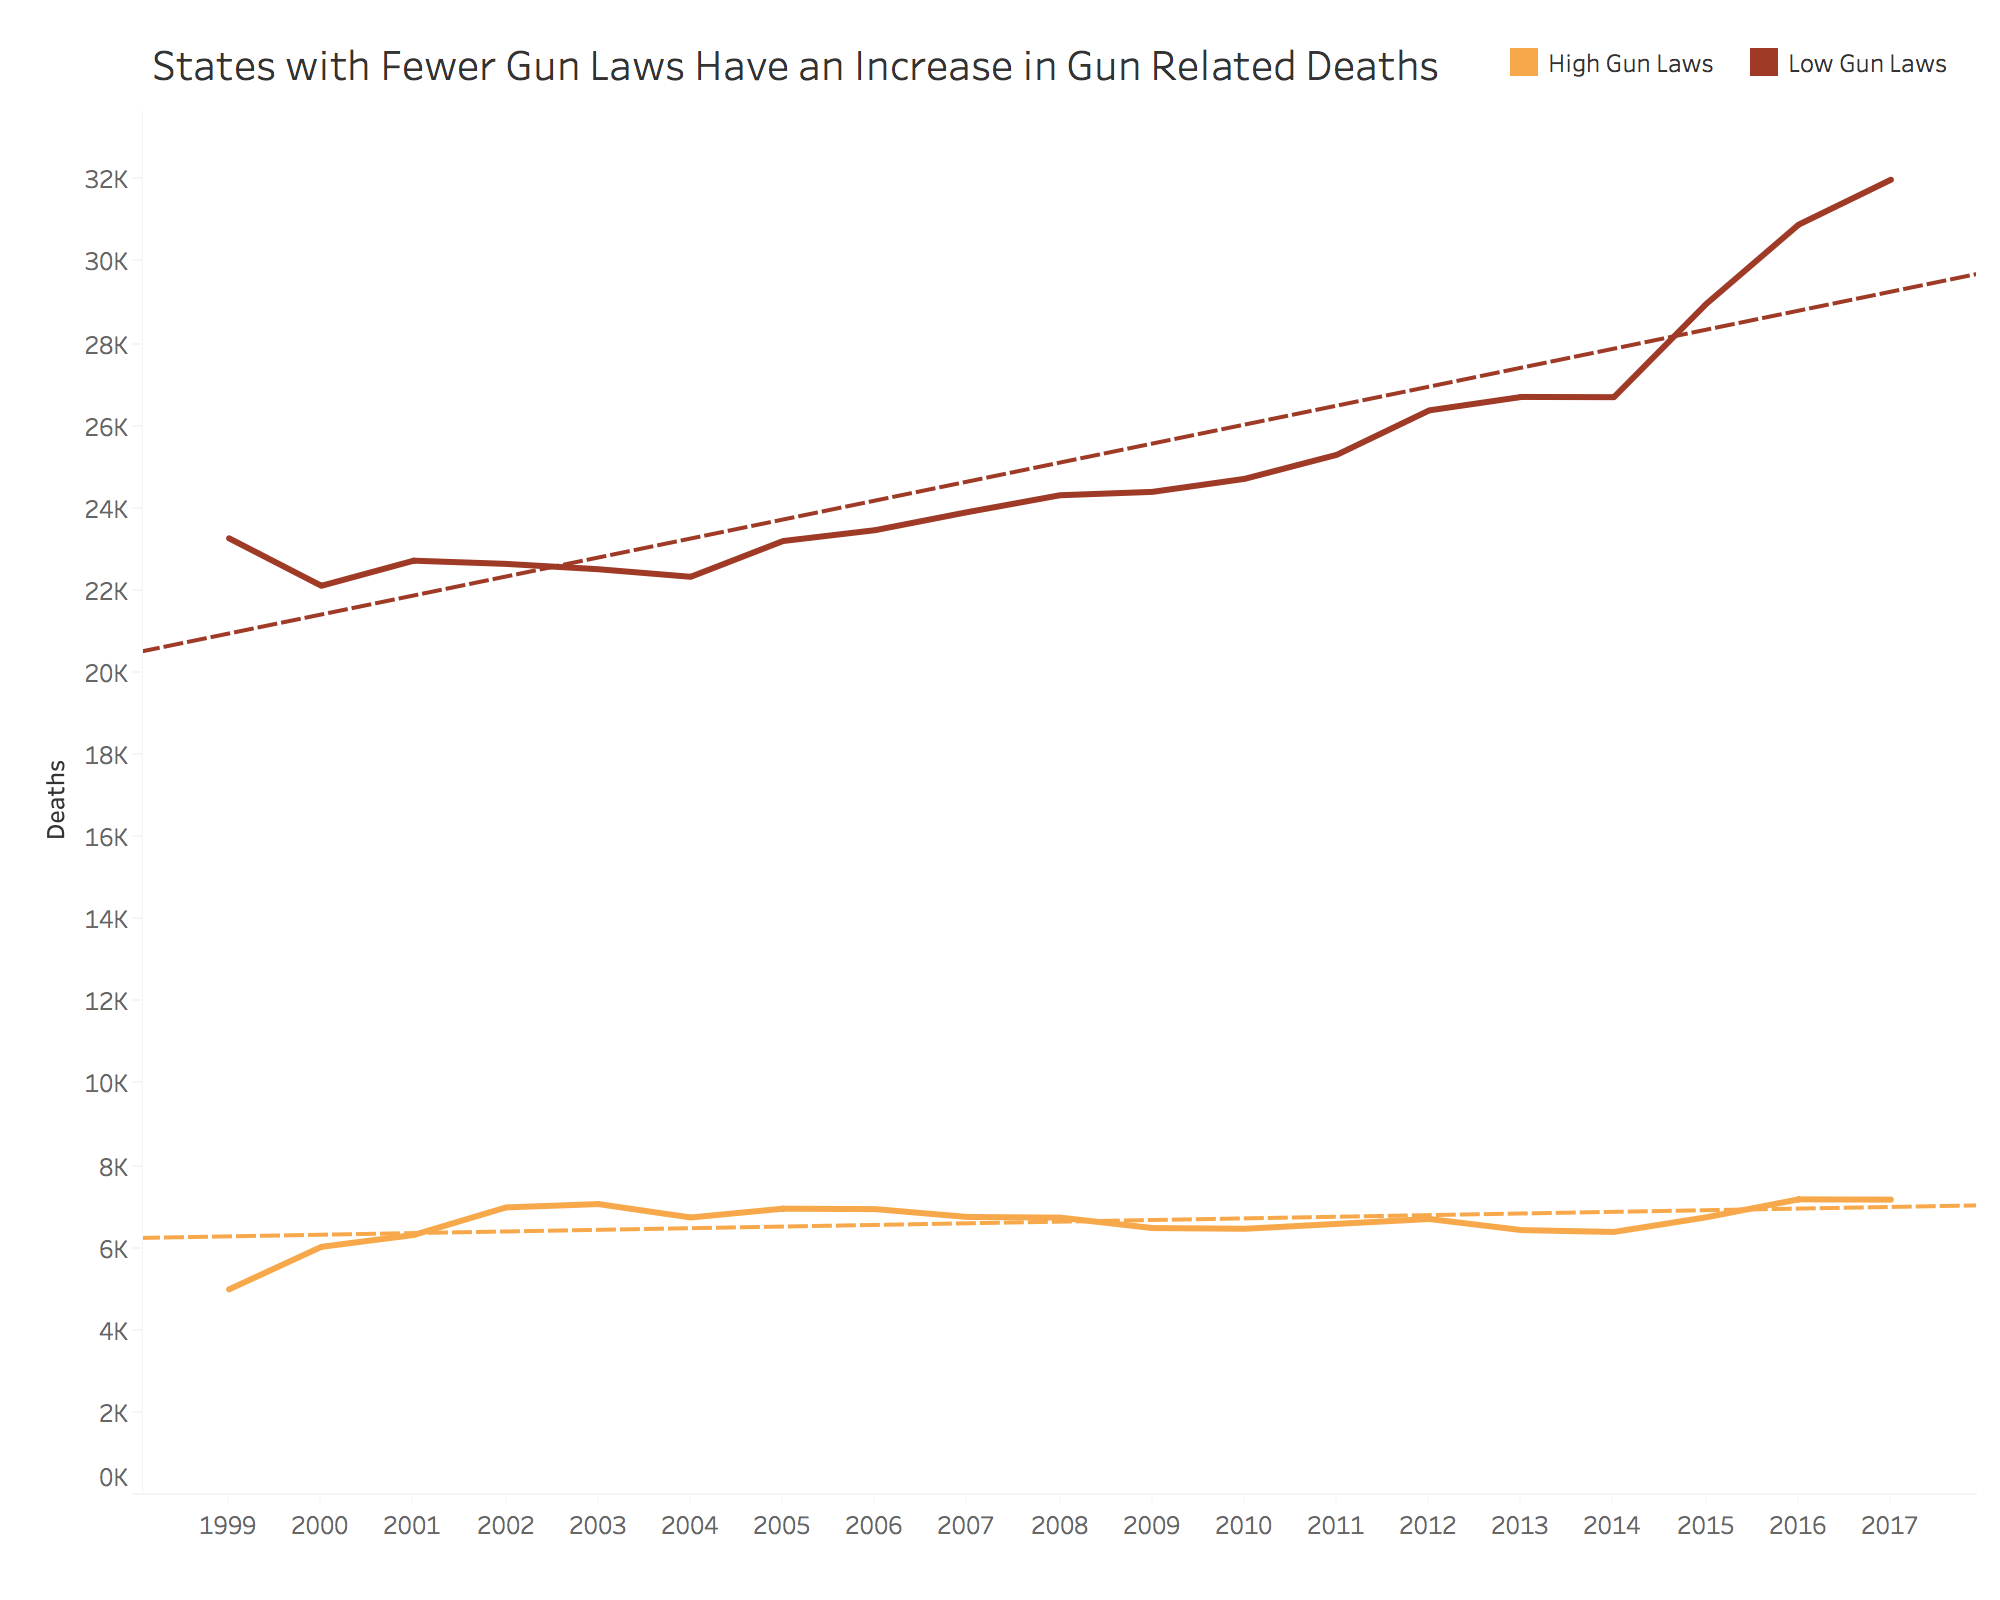

In [26]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/state_gun_law_deaths.png', width=800, height=600)

#### Finding the top 10 average deaths per capita by guns per state and cause of death

In [27]:
df_state_tot.groupby(['State','cause_of_death'])['Deaths','Deaths_per_capita', 'Deaths_x_guns', 'Deaths_percap_x_guns'].agg(['sum','mean']).reset_index().sort_values([('Deaths_percap_x_guns', 'mean')], ascending=False).head(10)

State   cause_of_death  ... Deaths_percap_x_guns          
                                     ...                  sum      mean
151        Wyoming  Suicide Firearm  ...             0.001599  0.000084
79         Montana  Suicide Firearm  ...             0.001533  0.000081
4           Alaska  Suicide Firearm  ...             0.001526  0.000080
37           Idaho  Suicide Firearm  ...             0.001151  0.000061
145  West Virginia  Suicide Firearm  ...             0.001150  0.000061
10        Arkansas  Suicide Firearm  ...             0.001044  0.000055
1          Alabama  Suicide Firearm  ...             0.000939  0.000049
73     Mississippi  Suicide Firearm  ...             0.000935  0.000049
52        Kentucky  Suicide Firearm  ...             0.000878  0.000046
124   South Dakota  Suicide Firearm  ...             0.000859  0.000045

[10 rows x 10 columns]

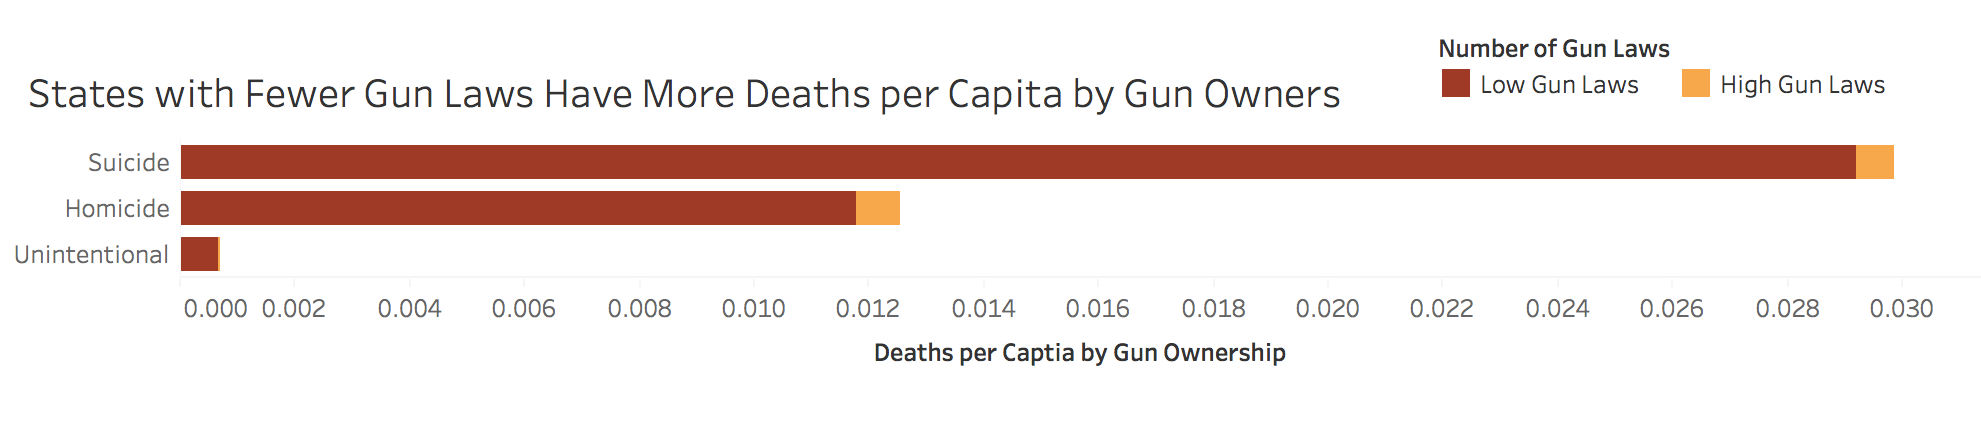

In [28]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/fewer_gun_laws_more_deaths.png', width=1350, height=300)

## Mass Shootings in the United States

**Deaths and injuries due to mass shootings in the US**

---

**Description of the Dataset:**

- Data on mass shootings was taken from [Mass Shooting Tracker](https://www.massshootingtracker.org/data), a website dedicated to recording all mass shootings that occur in the US.

- Data collected from 2013 - Present(2019).
  -  The data provided by the website is a csv file for each year, beginning in 2013. We combined the 7 files into one dataset in Excel for ease of use.
- Mass Shooting Tracker uses various valid news sources for their data, and records these sources in their dataset.
- The website defines a mass shooting as any firearm event involving in the injury or death of at least 4 people. 
- This data has been featured by CNN, MSNBC, The New York Times, The Washington Post, and The Economist
- Limitations:
   - This data is compiled by crowd-sourcing
   - While we would have liked to find a government funded data source on this topic,  Congress has effectively blocked the CDC from researching the underlying causes of gun violence as of December 2015, so this is a well compiled dataset from published researchers who volunteer their time. 

**citation:** Mass Shooting Tracker. (2019) {cited 2019 May 19}. Available from: https://www.massshootingtracker.org/data/all

In [29]:
df_ms.head()

,date,name_semicolon_delimited,killed,wounded,city,state,sources_semicolon_delimited
0,5/15/19,Unkown (victims included a 5-yr-old girl),0,4,Los Angeles,CA,https://abc7.com/3-men-5-year-old-girl-shot-at...
1,5/13/19,Unknown,4,1,St. Louis,MO,https://www.stltoday.com/news/local/crime-and-...
2,5/13/19,Unknown (victims included 1 juvenile),0,4,New Orleans,LA,https://www.wdsu.com/article/four-injured-in-c...
3,5/12/19,Unknown,0,4,Paulsboro,NJ,https://6abc.com/5-hurt-after-gunmen-open-fire...
4,5/11/19,Thomas Modzel,0,4,Effort,PA,https://wnep.com/2019/05/11/four-people-shot-a...


In [30]:
df_state_code.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


#### Create New Columns
* year
* month
* weekday
* shot
* shot_x_gun_owner


In [0]:
df_ms.date = pd.to_datetime(df_ms.date)
df_ms['year'] = df_ms.date.dt.year
df_ms['month'] = df_ms.date.dt.month
df_ms['weekday'] = df_ms.date.dt.day_name()

#### Merging the state names onto the mass shooting data set in order to merge the percent of gun owners per state and the amount of gun laws per year per state on the mass shootings data set

In [32]:
df_st_owner.head()

,State,Gun_Ownership_2007
0,Alabama,0.517
1,Alaska,0.578
2,Arizona,0.311
3,Arkansas,0.553
4,California,0.213


In [33]:
df_state_laws.rename(columns = {'state':'State'}, inplace = True)
df_state_laws.head()

,State,year,lawtotal
0,Alabama,1991,15
1,Alaska,1991,10
2,Arizona,1991,12
3,Arkansas,1991,15
4,California,1991,58


In [34]:
df_law_diff.head()

,State,Law_diff
0,Alabama,-1
1,Alaska,-1
2,Arizona,0
3,Arkansas,-2
4,California,15


In [0]:
df_ms_tot = df_ms.copy()
df_ms_tot = df_ms.merge(df_state_code, how ='left', left_on = 'state', right_on = 'Abbreviation')
df_ms_tot = df_ms_tot.merge(df_st_owner, how = 'left', on='State')
df_ms_tot = df_ms_tot.merge(df_state_laws, how = 'left', on = ['State', 'year'])
df_ms_tot = df_ms_tot.merge(df_law_diff, how = 'left', on = 'State')

#### Data Cleaning
* Drop unnecessary columns
* Change 'state' into same format
* Change 'date' from string to datetime

In [0]:
df_ms_tot.drop(['name_semicolon_delimited','sources_semicolon_delimited', 'state', 'Abbreviation'],axis = 1, inplace = True)

In [0]:
# New calculated columns

df_ms_tot['shot'] = df_ms_tot.killed + df_ms_tot.wounded
df_ms_tot['shot_x_gun_owner'] = df_ms_tot.shot*df_ms_tot['Gun_Ownership_2007']

In [0]:
# Creating New Column: duration_shooting

df_ms_tot2 = df_ms_tot.sort_values('date')
df_ms_tot2['pre_shooting_date'] = df_ms_tot2.groupby(['State'])['date'].shift(1)

# chage date from string to datetime
df_ms_tot2.date = pd.to_datetime(df_ms_tot2.date)
df_ms_tot2.pre_shooting_date = pd.to_datetime(df_ms_tot2.pre_shooting_date)

df_ms_tot2['cummin_preshoot'] = df_ms_tot2.groupby(['State','date'])['pre_shooting_date'].cummin()
df_ms_tot2['duration_shooting'] = df_ms_tot2.date - df_ms_tot2.cummin_preshoot

## Feature Descriptions 

**date:** Date when the shooting happened 

**killed:** The number of people killed

**wounded:** The number of people wounded

**city:** The city where the shooting took place

**State:** The state where the shooting took place

**Gun_Ownership_2007:** The percent of people who own guns per state

**year:** The year when the shooting happened

**weekday:** The day of the week that the shooting took place

**shot:** The number of people either killed or wounded in a mass shooting

**shot_x_gun_owner:** The interaction term of the number of people who were wounded in a mass shooting multiplied by the percent of gun owners in that state where the shooting occurred. 

**lawtotal:** The total number of gun laws per state per year

**Law_diff:** The difference in the number of gun laws per state from 2011 thru 2018 (negative means that there is a decrease in the number of gun laws)

**duration_shooting:** Days from the last mass shooting that took place in the same state

In [42]:
df_ms_tot2.head()

,date,killed,wounded,city,year,month,weekday,State,Gun_Ownership_2007,lawtotal,Law_diff,shot,shot_x_gun_owner,pre_shooting_date,cummin_preshoot,duration_shooting
2504,2013-01-01,2,3,Sacramento,2013,1,Tuesday,California,0.213,99.0,15.0,5,1.065,NaT,NaT,NaT
2501,2013-01-01,1,3,Hawthorne,2013,1,Tuesday,California,0.213,99.0,15.0,4,0.852,2013-01-01,2013-01-01,0 days
2503,2013-01-01,0,4,McKeesport,2013,1,Tuesday,Pennsylvania,0.347,37.0,0.0,4,1.388,NaT,NaT,NaT
2502,2013-01-01,1,4,Lorain,2013,1,Tuesday,Ohio,0.324,15.0,1.0,5,1.620,NaT,NaT,NaT
2500,2013-01-05,4,0,Aurora,2013,1,Saturday,Colorado,0.347,30.0,13.0,4,1.388,NaT,NaT,NaT


In [43]:
df_ms_tot2.groupby('year')['killed','wounded'].agg(['sum','count','mean','max','min'])

killed                         wounded                         
        sum count      mean max min     sum count      mean  max min
year                                                                
2013    467   339  1.377581  13   0    1176   339  3.469027   19   0
2014    364   325  1.120000   8   0    1213   325  3.732308   16   0
2015    469   371  1.264151  16   0    1387   371  3.738544   22   0
2016    606   477  1.270440  50   0    1781   477  3.733753   53   0
2017    590   427  1.381733  59   0    1981   427  4.639344  422   0
2018    528   426  1.239437  17   0    1549   426  3.636150   17   0
2019    160   140  1.142857   6   0     497   140  3.550000    8   0

In [44]:
df_ms_tot2.groupby('month')['killed','wounded'].agg(['sum','mean','max','min'])

killed                   wounded                   
         sum      mean max min     sum      mean  max min
month                                                    
1        282  1.524324   6   0     586  3.167568   14   0
2        299  1.758824  17   0     553  3.252941   17   0
3        211  1.192090   6   0     630  3.559322   15   0
4        253  1.104803   8   0     818  3.572052   16   0
5        255  1.175115  10   0     843  3.884793   19   0
6        332  1.276923  50   0    1023  3.934615   53   0
7        285  1.021505   7   0    1080  3.870968   25   0
8        243  0.964286   8   0     953  3.781746   13   0
9        247  1.148837  13   0     804  3.739535   15   0
10       286  1.625000  59   0    1061  6.028409  422   0
11       289  1.537234  27   0     686  3.648936   20   0
12       202  1.286624  16   0     547  3.484076   22   0

In [45]:
df_ms_tot2.groupby('weekday')['killed','wounded'].agg(['sum','mean','max','min'])

killed                   wounded                   
             sum      mean max min     sum      mean  max min
weekday                                                      
Friday       393  1.408602  10   0     943  3.379928   13   0
Monday       387  1.353147  13   0     960  3.356643   18   0
Saturday     506  0.954717  11   0    2066  3.898113   25   0
Sunday       778  1.154303  59   0    3236  4.801187  422   0
Thursday     415  1.666667  10   0     778  3.124498   16   0
Tuesday      303  1.252066   6   0     818  3.380165   14   0
Wednesday    402  1.640816  17   0     783  3.195918   22   0

In [46]:
df_ms_tot2.groupby('State')['killed','wounded', 'shot'].agg(['sum','mean'])

killed           wounded             shot           
                        sum      mean     sum       mean   sum       mean
State                                                                    
Alabama                  81  1.227273     232   3.515152   313   4.742424
Alaska                    8  2.666667       6   2.000000    14   4.666667
Arizona                  79  2.135135      97   2.621622   176   4.756757
Arkansas                 21  1.105263      96   5.052632   117   6.157895
California              344  1.232975    1048   3.756272  1392   4.989247
Colorado                 51  1.545455     106   3.212121   157   4.757576
Connecticut              12  0.600000      88   4.400000   100   5.000000
Delaware                  9  0.818182      43   3.909091    52   4.727273
District of Columbia     22  0.733333     136   4.533333   158   5.266667
Florida                 297  1.659218     710   3.966480  1007   5.625698
Georgia                 120  1.188119     362   3.584158   482   4.772277
Idaho                     7  3.500000       1   0.500000     8   4.000000
Illinois                180  0.857143     833   3.966667  1013   4.823810
Indiana                  50  0.862069     216   3.724138   266   4.586207
Iowa                      5  0.714286      26   3.714286    31   4.428571
Kansas                   49  1.960000      78   3.120000   127   5.080000
Kentucky                 42  1.354839     113   3.645161   155   5.000000
Louisiana               100  1.052632     391   4.115789   491   5.168421
Maine                    16  3.200000       8   1.600000    24   4.800000
Maryland                 68  1.152542     216   3.661017   284   4.813559
Massachusetts             9  0.562500      66   4.125000    75   4.687500
Michigan                 64  0.941176     260   3.823529   324   4.764706
Minnesota                26  1.000000      97   3.730769   123   4.730769
Mississippi              53  1.394737     128   3.368421   181   4.763158
Missouri                102  1.324675     256   3.324675   358   4.649351
Montana                   8  2.666667       6   2.000000    14   4.666667
Nebraska                  6  0.857143      33   4.714286    39   5.571429
Nevada                   98  3.629630     495  18.333333   593  21.962963
New Jersey               53  0.757143     266   3.800000   319   4.557143
New Mexico               41  2.157895      46   2.421053    87   4.578947
New York                 76  0.745098     398   3.901961   474   4.647059
North Carolina           76  1.101449     239   3.463768   315   4.565217
North Dakota              6  3.000000       2   1.000000     8   4.000000
Ohio                    125  1.315789     343   3.610526   468   4.926316
Oklahoma                 46  1.437500      97   3.031250   143   4.468750
Oregon                   23  2.555556      30   3.333333    53   5.888889
Pennsylvania            112  1.154639     353   3.639175   465   4.793814
Rhode Island              0  0.000000      17   4.250000    17   4.250000
South Carolina           75  1.562500     157   3.270833   232   4.833333
South Dakota             10  5.000000       1   0.500000    11   5.500000
Tennessee                90  0.957447     356   3.787234   446   4.744681
Texas                   311  1.943750     555   3.468750   866   5.412500
Utah                     22  2.444444      18   2.000000    40   4.444444
Vermont                   4  4.000000       0   0.000000     4   4.000000
Virginia                 67  1.155172     204   3.517241   271   4.672414
Washington               50  1.785714      81   2.892857   131   4.678571
West Virginia            11  2.200000      12   2.400000    23   4.600000
Wisconsin                18  0.900000      69   3.450000    87   4.350000
Wyoming                   2  2.000000       2   2.000000     4   4.000000

In [47]:
df_ms_tot2.groupby('State')['shot_x_gun_owner'].mean().reset_index().sort_values('shot_x_gun_owner', ascending = False)

,State,shot_x_gun_owner
27,Nevada,7.423481
3,Arkansas,3.405316
39,South Dakota,3.113000
1,Alaska,2.697333
25,Montana,2.692667
23,Mississippi,2.634026
46,West Virginia,2.548400
0,Alabama,2.451833
48,Wyoming,2.388000
16,Kentucky,2.385000


262 cases with the number of people killed more than or equal to 4

In [0]:
(df_ms_tot.killed >= 4).sum()

262

breakdown to the number for each year

In [0]:
df_ms_tot.loc[df_ms_tot.killed >= 4].groupby('year')['killed'].count()

year
2013    47
2014    29
2015    40
2016    43
2017    44
2018    46
2019    13
Name: killed, dtype: int64

breakdown to the number for each states

In [0]:
df_ms_tot.loc[df_ms_tot.killed >= 4].groupby('State')['killed'].count().reset_index().sort_values('killed', ascending = False)

,State,killed
37,Texas,31
4,California,22
9,Florida,16
12,Illinois,13
30,Ohio,11
33,Pennsylvania,11
22,Missouri,10
27,New York,8
34,South Carolina,8
2,Arizona,8
